### Using Python to Identify and Plotting The Total Number of Awards and Nominations Recieved By Each Films

### Importing Libraries

In [124]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import Datasets

In [125]:
oscars=pd.read_csv('OscarsDatasets.csv')

### Data Imported

In [126]:
print(oscars.to_string())

       year_film  year_ceremony  ceremony                                                                                                                                   category                                                                                                                                                                                                                                                                                      name                                                                                                                             film     winner  winner_binary    win
0           1927           1928         1                                                                                                                                      ACTOR                                                                                                                                                                                                   

In [127]:
oscars.head()

year_film  year_ceremony  ceremony category                 name  \
0       1927           1928         1    ACTOR  Richard Barthelmess   
1       1927           1928         1    ACTOR        Emil Jannings   
2       1927           1928         1  ACTRESS       Louise Dresser   
3       1927           1928         1  ACTRESS         Janet Gaynor   
4       1927           1928         1  ACTRESS       Gloria Swanson   

               film     winner  winner_binary    win  
0         The Noose  NOMINATED              0  False  
1  The Last Command     WINNER              1   True  
2   A Ship Comes In  NOMINATED              0  False  
3        7th Heaven     WINNER              1   True  
4    Sadie Thompson  NOMINATED              0  False

In [128]:
oscars.tail()

year_film  year_ceremony  ceremony                          category  \
10884       2023           2024        96     WRITING (Original Screenplay)   
10885       2023           2024        96  JEAN HERSHOLT HUMANITARIAN AWARD   
10886       2023           2024        96                    HONORARY AWARD   
10887       2023           2024        96                    HONORARY AWARD   
10888       2023           2024        96                    HONORARY AWARD   

                                                    name        film  \
10884                             Written by Celine Song  Past Lives   
10885                                                NaN         NaN   
10886  To Angela Bassett, who has inspired audiences ...         NaN   
10887  To Mel Brooks, for his comedic brilliance, pro...         NaN   
10888  To Carol Littleton, whose commitment to her cr...         NaN   

          winner  winner_binary    win  
10884  NOMINATED              0  False  
10885     WINNER              1   True  
10886     WINNER              1   True  
10887     WINNER              1   True  
10888     WINNER              1   True

In [129]:
oscars.shape

(10889, 9)

### Get Info About Data

In [130]:
oscars.info

<bound method DataFrame.info of        year_film  year_ceremony  ceremony                          category  \
0           1927           1928         1                             ACTOR   
1           1927           1928         1                             ACTOR   
2           1927           1928         1                           ACTRESS   
3           1927           1928         1                           ACTRESS   
4           1927           1928         1                           ACTRESS   
...          ...            ...       ...                               ...   
10884       2023           2024        96     WRITING (Original Screenplay)   
10885       2023           2024        96  JEAN HERSHOLT HUMANITARIAN AWARD   
10886       2023           2024        96                    HONORARY AWARD   
10887       2023           2024        96                    HONORARY AWARD   
10888       2023           2024        96                    HONORARY AWARD   

                   

In [131]:
oscars.describe()

year_film  year_ceremony      ceremony  winner_binary
count  10889.000000   10889.000000  10889.000000   10889.000000
mean    1976.608596    1977.608596     49.633024       0.226375
std       27.358261      27.358261     27.316863       0.418504
min     1927.000000    1928.000000      1.000000       0.000000
25%     1952.000000    1953.000000     25.000000       0.000000
50%     1976.000000    1977.000000     49.000000       0.000000
75%     2001.000000    2002.000000     74.000000       0.000000
max     2023.000000    2024.000000     96.000000       1.000000

In [132]:
oscars.isna().sum()

year_film          0
year_ceremony      0
ceremony           0
category           0
name               5
film             319
winner             0
winner_binary      0
win                0
dtype: int64

In [133]:
oscars_nulls=oscars[oscars['film'].isnull()][['year_film','winner', 'category']]
display(oscars_nulls.category.value_counts())


category
HONORARY AWARD                          133
SPECIAL AWARD                            56
IRVING G. THALBERG MEMORIAL AWARD        45
JEAN HERSHOLT HUMANITARIAN AWARD         44
ASSISTANT DIRECTOR                       18
SOUND RECORDING                           8
HONORARY FOREIGN LANGUAGE FILM AWARD      5
SPECIAL ACHIEVEMENT AWARD                 3
ENGINEERING EFFECTS                       2
WRITING (Title Writing)                   2
SPECIAL FOREIGN LANGUAGE FILM AWARD       2
GORDON E. SAWYER AWARD                    1
Name: count, dtype: int64

In [134]:
oscars[(oscars['category'].isin(oscars_nulls.category.value_counts().index)) & (oscars['film'].isnull())]

year_film  year_ceremony  ceremony                          category  \
16          1927           1928         1               ENGINEERING EFFECTS   
18          1927           1928         1               ENGINEERING EFFECTS   
31          1927           1928         1           WRITING (Title Writing)   
32          1927           1928         1           WRITING (Title Writing)   
33          1927           1928         1                     SPECIAL AWARD   
...          ...            ...       ...                               ...   
10763       2022           2023        95            GORDON E. SAWYER AWARD   
10885       2023           2024        96  JEAN HERSHOLT HUMANITARIAN AWARD   
10886       2023           2024        96                    HONORARY AWARD   
10887       2023           2024        96                    HONORARY AWARD   
10888       2023           2024        96                    HONORARY AWARD   

                                                    name film     winner  \
16                                        Ralph Hammeras  NaN  NOMINATED   
18                                      Nugent Slaughter  NaN  NOMINATED   
31                                        Joseph Farnham  NaN     WINNER   
32                                    George Marion, Jr.  NaN  NOMINATED   
33                                          Warner Bros.  NaN     WINNER   
...                                                  ...  ...        ...   
10763                                          Iain Neil  NaN     WINNER   
10885                                                NaN  NaN     WINNER   
10886  To Angela Bassett, who has inspired audiences ...  NaN     WINNER   
10887  To Mel Brooks, for his comedic brilliance, pro...  NaN     WINNER   
10888  To Carol Littleton, whose commitment to her cr...  NaN     WINNER   

       winner_binary    win  
16                 0  False  
18                 0  False  
31                 1   True  
32                 0  False  
33                 1   True  
...              ...    ...  
10763              1   True  
10885              1   True  
10886              1   True  
10887              1   True  
10888              1   True  

[319 rows x 9 columns]

### Removing Empty Rows

In [135]:
oscars=oscars.dropna()

### After Removing Empty Rows

In [136]:
oscars.shape

(10570, 9)

# Award categories 

There are over 100 categories in the dataset.
Fortunately, Wikipedia lists the  most important awards (the big five): 
- Best Picture
- Best Director
- Best Actor
- Best Actress
- Best Screenplay 



In [137]:
by_cat=oscars.groupby(by='category', as_index=False).agg({'film':'count'})
by_cat=by_cat.sort_values(by='film', ascending=False, ignore_index=True)
print(len(by_cat))
display(by_cat.head(10))

107


category  film
0                     DIRECTING   469
1                  FILM EDITING   450
2    ACTOR IN A SUPPORTING ROLE   440
3  ACTRESS IN A SUPPORTING ROLE   440
4   DOCUMENTARY (Short Subject)   378
5                  BEST PICTURE   371
6         DOCUMENTARY (Feature)   345
7                CINEMATOGRAPHY   338
8         FOREIGN LANGUAGE FILM   315
9                 ART DIRECTION   307

In [138]:
oscars['category']=[word.lower() for word in oscars['category']]

C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\3407317126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars['category']=[word.lower() for word in oscars['category']]


In [139]:
oscars['category_adj']=oscars['category']

C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\2202007139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars['category_adj']=oscars['category']


In [140]:
def unique_categories(name):
    '''The function takes and argument "name", searches in the categories for the keyword("name") and returns a list unique categories that contain the keyword'''
    words_found=[]
    for category in oscars['category']:
        words_found.append(category.find(name))

    idices_with_var=[i for (i,m) in list(enumerate(words_found)) if m!=-1]

    names_only = [m for (i,m) in list(enumerate(oscars['category'])) if (i in idices_with_var)]

    return list(set(names_only))

In [141]:
def replacing_categories(list_to_replace, new_category):
    '''the function replaces a list of strings that should be repaced with a new string in the category_adj column,
     and returns a message with the number of replacements that have been done'''
    for old_category in list_to_replace:
        oscars['category_adj'].replace(to_replace=old_category, value=new_category, inplace=True)
    frequency_of_new_category=len(oscars[oscars['category_adj']==new_category])
    message = f'{frequency_of_new_category} category have been replaced in category_adj column with "{new_category}"'
    return message

## Screenplay

In [142]:
display(unique_categories('screenplay'))

['writing (story and screenplay--based on factual material or material not previously published or produced)',
 'writing (screenplay based on material from another medium)',
 'writing (screenplay--original)',
 'writing (story and screenplay--based on material not previously published or produced)',
 'writing (adapted screenplay)',
 'writing (original screenplay)',
 'writing (screenplay)',
 'writing (story and screenplay)',
 'writing (story and screenplay--written directly for the screen)',
 'writing (screenplay written directly for the screen--based on factual material or on story material not previously published or produced)',
 'writing (screenplay based on material previously produced or published)',
 'writing (screenplay--adapted)',
 'writing (screenplay--based on material from another medium)',
 'writing (screenplay adapted from other material)',
 'writing (screenplay written directly for the screen)']

Accordig to the definition I have found for the screenplay awards, it should be original screenplay, so let us cluster together categories that look like original screeenplay into one.
Also, for me, I really enjoy watching movies with orignal plot:)

In [143]:
names_to_replace=['writing (original screenplay)','writing (screenplay written directly for the screen)',
 'writing (screenplay written directly for the screen--based on factual material or on story material not previously published or produced)',
 'writing (screenplay)', 'writing (screenplay--original)','writing (story and screenplay)','writing (story and screenplay--based on factual material or material not previously published or produced)','writing (story and screenplay--based on material not previously published or produced)',
 'writing (story and screenplay--written directly for the screen)']

print(replacing_categories(names_to_replace, 'original_screenplay'))

519 category have been replaced in category_adj column with "original_screenplay"


C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\617226662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars['category_adj'].replace(to_replace=old_category, value=new_category, inplace=True)


## Best Picture

In [144]:
display(unique_categories('picture'))

['music (song--original for the picture)',
 'best picture',
 'unique and artistic picture',
 'best motion picture',
 'music (original score--for a motion picture [not a musical])',
 'music (score of a musical picture--original or adaptation)',
 'music (scoring of a musical picture)',
 'music (music score of a dramatic picture)',
 'outstanding picture',
 'outstanding motion picture',
 'directing (dramatic picture)',
 'writing (motion picture story)',
 'writing (original motion picture story)',
 'music (music score of a dramatic or comedy picture)',
 'directing (comedy picture)']

In [145]:
names_to_replace=['best motion picture', 'best picture' ]

print(replacing_categories(names_to_replace, 'best_picture'))

461 category have been replaced in category_adj column with "best_picture"


C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\617226662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars['category_adj'].replace(to_replace=old_category, value=new_category, inplace=True)


## Actor

In [146]:
display(unique_categories('actor'))

['actor in a leading role', 'actor in a supporting role', 'actor']

In [147]:
names_to_replace=['actor', 'actor in a leading role']

print(replacing_categories(names_to_replace, 'best_actor'))

472 category have been replaced in category_adj column with "best_actor"


C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\617226662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars['category_adj'].replace(to_replace=old_category, value=new_category, inplace=True)


## Actress

In [148]:
display(unique_categories('actress'))

['actress in a supporting role', 'actress', 'actress in a leading role']

In [149]:
names_to_replace=['actress', 'actress in a leading role']

print(replacing_categories(names_to_replace, 'best_actress'))

476 category have been replaced in category_adj column with "best_actress"


C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\617226662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars['category_adj'].replace(to_replace=old_category, value=new_category, inplace=True)


## Director

In [150]:
display(unique_categories('direct'))

['directing',
 'dance direction',
 'assistant director',
 'art direction',
 'art direction (black-and-white)',
 'writing (story and screenplay--written directly for the screen)',
 'writing (screenplay written directly for the screen--based on factual material or on story material not previously published or produced)',
 'directing (dramatic picture)',
 'art direction (color)',
 'directing (comedy picture)',
 'writing (screenplay written directly for the screen)']

In [151]:
names_to_replace=['directing',  'directing (comedy picture)',  'directing (dramatic picture)',]

print(replacing_categories(names_to_replace, 'best_director'))

474 category have been replaced in category_adj column with "best_director"


C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\617226662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars['category_adj'].replace(to_replace=old_category, value=new_category, inplace=True)


## Category  adjusted check

In [152]:
the_big_five=['original_screenplay','best_picture', 'best_actress','best_actor', 'best_director']

In [153]:
oscars['the_big_five']=oscars['category_adj'].isin(the_big_five)

C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\3680237932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars['the_big_five']=oscars['category_adj'].isin(the_big_five)


In [154]:
top_10_cat_dist=oscars.groupby(by='category_adj', as_index=False)[['film', 'winner_binary']].agg({'film':'count','winner_binary':'mean'}).sort_values(by='film', ascending=False, ignore_index=True ).head(60)
top_10_cat_dist

category_adj  film  winner_binary
0                                 original_screenplay   519       0.200385
1                                        best_actress   476       0.203782
2                                       best_director   474       0.204641
3                                          best_actor   472       0.205508
4                                        best_picture   461       0.173536
5                                        film editing   450       0.200000
6                          actor in a supporting role   440       0.200000
7                        actress in a supporting role   440       0.200000
8                         documentary (short subject)   378       0.211640
9                               documentary (feature)   345       0.228986
10                                     cinematography   338       0.207101
11                              foreign language film   315       0.200000
12                                      art direction   307       0.192182
13                                     costume design   295       0.200000
14                             music (original score)   270       0.181481
15                                              sound   245       0.200000
16                              music (original song)   235       0.208511
17                           short film (live action)   226       0.221239
18                              short film (animated)   215       0.232558
19                                       music (song)   215       0.167442
20                                    sound recording   187       0.139037
21                            short subject (cartoon)   169       0.230769
22                   cinematography (black-and-white)   161       0.167702
23                                     visual effects   155       0.277419
24  music (music score of a dramatic or comedy pic...   148       0.128378
25                    art direction (black-and-white)   138       0.181159
26                             cinematography (color)   135       0.200000
27               music (scoring of a musical picture)   127       0.157480
28                              art direction (color)   112       0.223214
29                       writing (adapted screenplay)   110       0.200000
30                             outstanding production   102       0.107843
31                              animated feature film    99       0.232323
32  writing (screenplay--based on material from an...    95       0.200000
33                                    special effects    93       0.268817
34                           short subject (one-reel)    90       0.233333
35                                             makeup    87       0.344828
36                                      sound editing    86       0.244186
37                                       sound mixing    85       0.200000
38                           short subject (two-reel)    81       0.259259
39                             costume design (color)    77       0.220779
40                   costume design (black-and-white)    77       0.220779
41                        short subject (live action)    68       0.250000
42  writing (screenplay based on material from ano...    65       0.200000
43                                    music (scoring)    64       0.125000
44                                  production design    60       0.200000
45  writing (screenplay based on material previous...    55       0.200000
46                           writing (original story)    52       0.230769
47                     writing (motion picture story)    50       0.200000
48                              sound effects editing    47       0.340426
49                             makeup and hairstyling    46       0.260870
50                    music (original dramatic score)    41       0.195122
51  music (scoring of music--adaptation or treatment)    30       0.200000
52                         outstanding motion picture    30       

# Creating award categories

In [155]:
oscars['winner_binary']=oscars['winner_binary'].astype('int')
oscars['the_big_five']=oscars['the_big_five'].astype('int')

C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\3863979840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars['winner_binary']=oscars['winner_binary'].astype('int')
C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\3863979840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars['the_big_five']=oscars['the_big_five'].astype('int')


In [156]:
oscars['big_five_winner']=oscars['winner_binary']*oscars['the_big_five']
oscars['big_five_nominated_only']=oscars['the_big_five']-oscars['big_five_winner']
oscars['other_winner']=oscars['winner_binary']-oscars['big_five_winner']
oscars['other_nominate_only']=oscars['winner_binary'].replace(to_replace=0,value=2)
oscars['other_nominate_only']=(oscars['other_nominate_only']-oscars['big_five_winner']-oscars['other_winner']-oscars['big_five_nominated_only']*2)/2


C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\2188797139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars['big_five_winner']=oscars['winner_binary']*oscars['the_big_five']
C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\2188797139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars['big_five_nominated_only']=oscars['the_big_five']-oscars['big_five_winner']
C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\2188797139.py:3: SettingWithCopyWarning: 
A value is trying to be

In [157]:
cols= ['other_nominate_only', 
       'other_winner',
       'big_five_nominated_only',
       'big_five_winner',
       'winner', 
       'the_big_five']
display(oscars[cols].sum())
print('------\n')
print(oscars[['other_nominate_only','other_winner','big_five_nominated_only','big_five_winner']].sum().sum())
print(oscars.shape[0])

other_nominate_only                                                   6471.0
other_winner                                                            1697
big_five_nominated_only                                                 1927
big_five_winner                                                          475
winner                     NOMINATEDWINNERNOMINATEDWINNERNOMINATEDNOMINAT...
the_big_five                                                            2402
dtype: object

------

10570.0
10570


# Indexing

I would like to create some kind of a simple score to take into account all nominations and awards.
So, 
- winning a big five award: 4 points
- winning another award: 3 points
- nomination to a big five award: 2 points
- nomination to any other award: 1 points

This way may be better to see which movies have been mosty appriciated by critics

Also, good to have a total number of nominations and awards, to compare with other sources:)

In [158]:
#First, I need to group observations by movies, for now, I also take away actors 
highest_score=oscars.groupby(by='film', as_index=False)[
    ['year_ceremony','other_nominate_only','other_winner','big_five_nominated_only','big_five_winner']].agg({
        'year_ceremony':'mean',
        'big_five_winner':'sum',
        'other_winner':'sum',
        'big_five_nominated_only':'sum',
        'other_nominate_only':'sum'}).sort_values(
    by=['big_five_winner',
        'other_winner',
        'big_five_nominated_only',
        'other_nominate_only'], 
    ascending=False)
#cleanign up the format of certain valuables
summary['year_ceremony']=summary['year_ceremony'].astype('int')
summary['other_nominate_only']=summary['other_nominate_only'].astype('int')
summary.shape

(5041, 8)

## Get Info

In [159]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5041 entries, 0 to 5040
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   film                      5041 non-null   object
 1   year_ceremony             5041 non-null   int32 
 2   big_five_winner           5041 non-null   int32 
 3   other_winner              5041 non-null   int32 
 4   big_five_nominated_only   5041 non-null   int32 
 5   other_nominate_only       5041 non-null   int32 
 6   total_nominations_awards  5041 non-null   int32 
 7   score                     5041 non-null   int32 
dtypes: int32(7), object(1)
memory usage: 177.4+ KB


In [160]:
#creating a column for total number of awards and nomination (to compare to the database in wikipedia or other source)
summary['total_nominations_awards']=(
    summary['big_five_winner']+ 
    summary['other_winner']+
    summary['big_five_nominated_only']+  
    summary['other_nominate_only'])

#indexing as described in the intro to this section
summary['score']=(summary['big_five_winner']*4+ 
                  summary['other_winner']*3+
                  summary['big_five_nominated_only']*2+
                  summary['other_nominate_only']*1)

#sorting the dataframe
summary=summary.sort_values(
    by=['score',
        'big_five_winner',
        'other_winner',
        'big_five_nominated_only',
        'other_nominate_only'], 
    ascending=False).reset_index(drop=True)

In [161]:
summary.head()

film  year_ceremony  big_five_winner  other_winner  \
0                Titanic           1992                3             9   
1        West Side Story           1985                2             9   
2         A Star Is Born           1974                0             3   
3                Ben-Hur           1960                3             8   
4  From Here to Eternity           1954                3             5   

   big_five_nominated_only  other_nominate_only  total_nominations_awards  \
0                        1                    3                        16   
1                        2                    5                        18   
2                        9                   13                        25   
3                        0                    1                        12   
4                        3                    2                        13   

   score  
0     44  
1     44  
2     40  
3     37  
4     35

# The final list

Since, we are not likely to watch all 4.8k movies. I will select the top ones with score above 30.
There are 15 such movies, distributed across all years.

In [162]:
len(summary[summary['score']>=30])

16

In [163]:
highest_score=summary[summary['score']>=30]
highest_score

film  year_ceremony  \
0                                         Titanic           1992   
1                                 West Side Story           1985   
2                                  A Star Is Born           1974   
3                                         Ben-Hur           1960   
4                           From Here to Eternity           1954   
5   The Lord of the Rings: The Return of the King           2004   
6                             The English Patient           1997   
7                              Gone with the Wind           1940   
8                               On the Waterfront           1955   
9                                          Gandhi           1983   
10                                        Amadeus           1985   
11                                   My Fair Lady           1965   
12                            Shakespeare in Love           1999   
13                                  All about Eve           1951   
14                                     La La Land           2017   
15                                    Oppenheimer           2024   

    big_five_winner  other_winner  big_five_nominated_only  \
0                 3             9                        1   
1                 2             9                        2   
2                 0             3                        9   
3                 3             8                        0   
4                 3             5                        3   
5                 2             9                        0   
6                 2             7                        2   
7                 3             5                        1   
8                 4             4                        0   
9                 4             4                        0   
10                3             5                        1   
11                3             5                        0   
12                3             4                        1   
13                3             3                        2   
14                2             4                        3   
15                3             4                        0   

    other_nominate_only  total_nominations_awards  score  
0                     3                        16     44  
1                     5                        18     44  
2                    13                        25     40  
3                     1                        12     37  
4                     2                        13     35  
5                     0                        11     35  
6                     1                        12     34  
7                     4                        13     33  
8                     4                        12     32  
9                     3                        11     31  
10                    2                        11     31  
11                    4                        12     31  
12                    5                        13     31  
13                    6                        14     31  
14                    5                        14     31  
15                    6                        13     30

### Titanic Was Released In 1997, So the year ceremony is 1998, So we need to update the data

In [165]:
highest_score.loc[0, 'year_ceremony'] = 1997

### West Side Story Classic One Was Released In 1961, So the year ceremony is 1962, So we need to update the data

In [164]:
highest_score.loc[1, 'year_ceremony'] = 1962

In [166]:
highest_score

film  year_ceremony  \
0                                         Titanic           1997   
1                                 West Side Story           1962   
2                                  A Star Is Born           1974   
3                                         Ben-Hur           1960   
4                           From Here to Eternity           1954   
5   The Lord of the Rings: The Return of the King           2004   
6                             The English Patient           1997   
7                              Gone with the Wind           1940   
8                               On the Waterfront           1955   
9                                          Gandhi           1983   
10                                        Amadeus           1985   
11                                   My Fair Lady           1965   
12                            Shakespeare in Love           1999   
13                                  All about Eve           1951   
14                                     La La Land           2017   
15                                    Oppenheimer           2024   

    big_five_winner  other_winner  big_five_nominated_only  \
0                 3             9                        1   
1                 2             9                        2   
2                 0             3                        9   
3                 3             8                        0   
4                 3             5                        3   
5                 2             9                        0   
6                 2             7                        2   
7                 3             5                        1   
8                 4             4                        0   
9                 4             4                        0   
10                3             5                        1   
11                3             5                        0   
12                3             4                        1   
13                3             3                        2   
14                2             4                        3   
15                3             4                        0   

    other_nominate_only  total_nominations_awards  score  
0                     3                        16     44  
1                     5                        18     44  
2                    13                        25     40  
3                     1                        12     37  
4                     2                        13     35  
5                     0                        11     35  
6                     1                        12     34  
7                     4                        13     33  
8                     4                        12     32  
9                     3                        11     31  
10                    2                        11     31  
11                    4                        12     31  
12                    5                        13     31  
13                    6                        14     31  
14                    5                        14     31  
15                    6                        13     30

### A Star Is Born has Incorrect Data, So I'm Replacing It With The Film With High Oscar Win And Nomination That is Lawrence Of Arabia Released in 1962

In [167]:
highest_score.loc[2, 'year_ceremony'] = 1963
highest_score.loc[2, 'film'] = 'Lawrence Of Arabia'
highest_score.loc[2, 'big_five_winner'] = 2
highest_score.loc[2, 'other_winner'] = 5
highest_score.loc[2, 'big_five_nominated_only'] = 2
highest_score.loc[2, 'other_nominate_only'] = 1

In [168]:
#Updating cell for 3rd rows after updating the data, total number of awards and nomination (to compare to the database in wikipedia or other source)
highest_score['total_nominations_awards']=(
    highest_score['big_five_winner']+ 
    highest_score['other_winner']+
    highest_score['big_five_nominated_only']+  
    highest_score['other_nominate_only'])

#indexing for 3rd row, inserting cells
highest_score['score']=(highest_score['big_five_winner']*4+ 
                  highest_score['other_winner']*3+
                  highest_score['big_five_nominated_only']*2+
                  highest_score['other_nominate_only']*1)

C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\1487378768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_score['total_nominations_awards']=(
C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_2676\1487378768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_score['score']=(highest_score['big_five_winner']*4+


In [169]:
highest_score

film  year_ceremony  \
0                                         Titanic           1997   
1                                 West Side Story           1962   
2                              Lawrence Of Arabia           1963   
3                                         Ben-Hur           1960   
4                           From Here to Eternity           1954   
5   The Lord of the Rings: The Return of the King           2004   
6                             The English Patient           1997   
7                              Gone with the Wind           1940   
8                               On the Waterfront           1955   
9                                          Gandhi           1983   
10                                        Amadeus           1985   
11                                   My Fair Lady           1965   
12                            Shakespeare in Love           1999   
13                                  All about Eve           1951   
14                                     La La Land           2017   
15                                    Oppenheimer           2024   

    big_five_winner  other_winner  big_five_nominated_only  \
0                 3             9                        1   
1                 2             9                        2   
2                 2             5                        2   
3                 3             8                        0   
4                 3             5                        3   
5                 2             9                        0   
6                 2             7                        2   
7                 3             5                        1   
8                 4             4                        0   
9                 4             4                        0   
10                3             5                        1   
11                3             5                        0   
12                3             4                        1   
13                3             3                        2   
14                2             4                        3   
15                3             4                        0   

    other_nominate_only  total_nominations_awards  score  
0                     3                        16     44  
1                     5                        18     44  
2                     1                        10     28  
3                     1                        12     37  
4                     2                        13     35  
5                     0                        11     35  
6                     1                        12     34  
7                     4                        13     33  
8                     4                        12     32  
9                     3                        11     31  
10                    2                        11     31  
11                    4                        12     31  
12                    5                        13     31  
13                    6                        14     31  
14                    5                        14     31  
15                    6                        13     30

In [170]:
# Sorting The Updated DataFrame
highest_score=highest_score.sort_values(
    by=['score',
        'big_five_winner',
        'other_winner',
        'big_five_nominated_only',
        'other_nominate_only'], 
    ascending=False).reset_index(drop=True)

### After Sorting The Updated DataFrame, New DataFrame Would Be:-

In [171]:
highest_score

film  year_ceremony  \
0                                         Titanic           1997   
1                                 West Side Story           1962   
2                                         Ben-Hur           1960   
3                           From Here to Eternity           1954   
4   The Lord of the Rings: The Return of the King           2004   
5                             The English Patient           1997   
6                              Gone with the Wind           1940   
7                               On the Waterfront           1955   
8                                          Gandhi           1983   
9                                         Amadeus           1985   
10                                   My Fair Lady           1965   
11                            Shakespeare in Love           1999   
12                                  All about Eve           1951   
13                                     La La Land           2017   
14                                    Oppenheimer           2024   
15                             Lawrence Of Arabia           1963   

    big_five_winner  other_winner  big_five_nominated_only  \
0                 3             9                        1   
1                 2             9                        2   
2                 3             8                        0   
3                 3             5                        3   
4                 2             9                        0   
5                 2             7                        2   
6                 3             5                        1   
7                 4             4                        0   
8                 4             4                        0   
9                 3             5                        1   
10                3             5                        0   
11                3             4                        1   
12                3             3                        2   
13                2             4                        3   
14                3             4                        0   
15                2             5                        2   

    other_nominate_only  total_nominations_awards  score  
0                     3                        16     44  
1                     5                        18     44  
2                     1                        12     37  
3                     2                        13     35  
4                     0                        11     35  
5                     1                        12     34  
6                     4                        13     33  
7                     4                        12     32  
8                     3                        11     31  
9                     2                        11     31  
10                    4                        12     31  
11                    5                        13     31  
12                    6                        14     31  
13                    5                        14     31  
14                    6                        13     30  
15                    1                        10     28

### Plotting The Above DataFrame

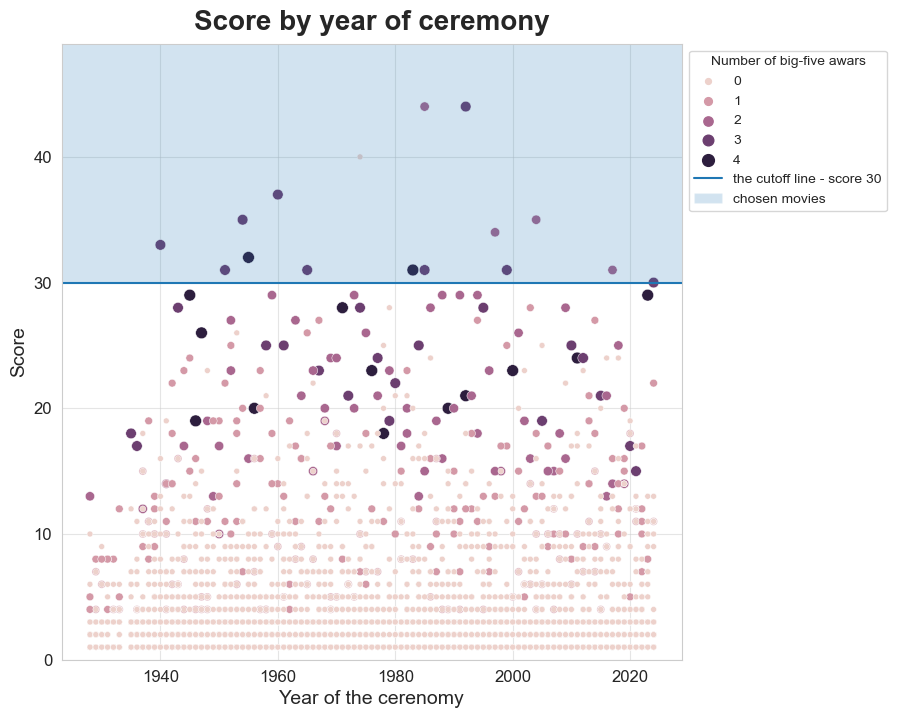

In [172]:
plt.subplots(figsize=(8,8))
sns.set_style('whitegrid')
ax=sns.scatterplot(data=summary, x='year_ceremony', y='score', hue='big_five_winner', size='big_five_winner')
ax.set_ylim(bottom=0, top=(max(summary['score'])+5))
ax.axhline(y=30, label='the cutoff line - score 30')
ax.axhspan(ymin=30, ymax=max(summary['score']+5), xmin=0, xmax=1, alpha=0.2, label='chosen movies')
ax.set_title('Score by year of ceremony', pad=10, weight='bold', fontsize=20)
ax.set_xlabel('Year of the cerenomy', fontsize=14)
ax.set_ylabel('Score',fontsize=14)
ax.tick_params(labelsize='large', grid_alpha=0.5)
plt.legend(title='Number of big-five awars', loc=2, bbox_to_anchor=(1,1), fontsize=10)
plt.show()

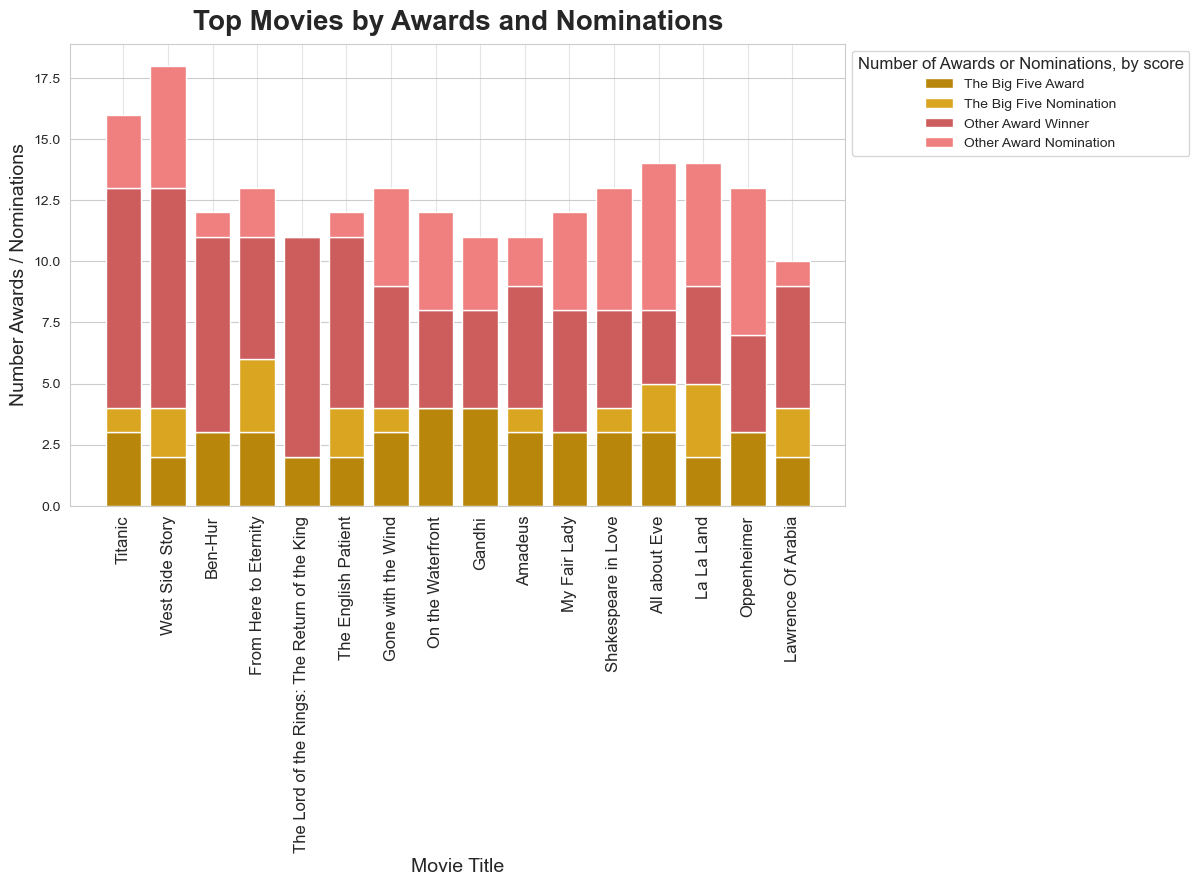

In [173]:
labels=highest_score['film']
fig, ax=plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')

ax.bar(x=labels, height=highest_score['big_five_winner'], label="The Big Five Award", color='darkgoldenrod')
ax.bar(x=labels, height=highest_score['big_five_nominated_only'], label="The Big Five Nomination", 
       bottom=highest_score['big_five_winner'], color='goldenrod')
ax.bar(x=labels, height=highest_score['other_winner'], label="Other Award Winner", 
       bottom=(highest_score['big_five_winner']+highest_score['big_five_nominated_only']), color='indianred')
ax.bar(x=labels, height=highest_score['other_nominate_only'], 
       label="Other Award Nomination", 
       bottom=(highest_score['big_five_winner']+highest_score['big_five_nominated_only']+highest_score['other_winner']),
      color='lightcoral')
ax.set_title('Top Movies by Awards and Nominations', pad=10, weight='bold', fontsize=20)
ax.set_xlabel('Movie Title', fontsize=14)
ax.set_ylabel('Number Awards / Nominations',fontsize=14)
ax.xaxis.set_tick_params(rotation=90, labelsize='large',grid_alpha=0.5)
plt.legend(title='Number of Awards or Nominations, by score', loc=2, bbox_to_anchor=(1,1), title_fontsize=12, fontsize=10)
plt.show()

As you can see above, the score of 30 as the cutoff point removes many movies that won 4 big awards,
but includes movies that have has many nominations - so, there could also be intresting.

I will start to epricially test the hypothesis, and if refutes, I can adjust the cutoff criteria!

Happy watching!!:)

## Comments 

I have compared my results with Wikipedia, and... they do not match.
However, it seems that the descripancy comes from the definition of screenplay.
Looking at two movies, which according to Wikipedia received an award for screenplay (the big five):
- "One Flew over the Cuckoo's Nest"
- "It Happened One Night"

I see that they received an award for adapted screen play, respectively:
- writing (screenplay adapted from other material)
- writing (adaptation)

It also makes sense, because as you could see on the diagram above, no movies received all 5 Oscars...

One of the criteria I used to identified the best screenplay academy award was that it has to be **original**, i.e. not adopted and the movies above do not classify.

Nonetheless, I am ok with that, mostly because my family likes original plot more than an adaptation, but this could also change in the future:)


In [174]:
display(oscars[oscars["film"]=="It Happened One Night"]['category'],
        oscars[oscars["film"]=="One Flew over the Cuckoo's Nest"]['category'])

266                     actor
269                   actress
282                 directing
301    outstanding production
323      writing (adaptation)
Name: category, dtype: object

5299                                               actor
5304                          actor in a supporting role
5310                                             actress
5327                                      cinematography
5337                                           directing
5351                                        film editing
5361                              music (original score)
5375                                        best picture
5397    writing (screenplay adapted from other material)
Name: category, dtype: object